In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tcd-dataset/tcd-is-2021-training.csv
/kaggle/input/tcd-dataset/tcd-is-2021-submission-real.csv
/kaggle/input/tcd-dataset/tcd-is-2021-test.csv
/kaggle/input/tcd-dataset/tcd-is-2021-submission-example.csv


* IMPORT Packages and Libraries required

In [2]:
import seaborn as seabornInstance 
import matplotlib.pyplot as plt
from sklearn import linear_model
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

**Import DataSet Files**

In [3]:
train = pd.read_csv('/kaggle/input/tcd-dataset/tcd-is-2021-training.csv')
test = pd.read_csv('/kaggle/input/tcd-dataset/tcd-is-2021-test.csv')

**To get the values for unique columns and feature set from the imported Files**

In [4]:
print("{} observations and {} features in train set.".format(*train.shape))
print("{} observations and {} features in test set.".format(*test.shape))

111993 observations and 12 features in train set.
73230 observations and 12 features in test set.


**Records and Columns**

In [5]:
train.shape

(111993, 12)

In [6]:
test.shape

(73230, 12)

**To view first 17 Records**

In [7]:
train.head(17)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.944160
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.327640
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.176700
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.757930
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.162170
5,6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.990300
6,7,1982.0,NaN,71.0,State of Palestine,1205185,program associate,Bachelor,0,Black,174,150319.422600
7,8,2008.0,male,36.0,Israel,31419,retail specialist,NaN,0,Brown,190,11849.028760
8,9,2015.0,male,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.206070
9,10,2019.0,female,16.0,Cuba,1325383,lease analyst,Bachelor,1,Black,157,90940.689120


**To View the Last 17 Records**

In [8]:
test.tail(17)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
73213,185207,1987.0,male,31.0,Kyrgyzstan,77136,jeweler,No,1,Blond,197,NaN
73214,185208,2002.0,male,41.0,Switzerland,1816578,staff auditor,NaN,1,Black,169,NaN
73215,185209,2013.0,female,45.0,Norway,638258,it security analyst,Bachelor,0,Black,130,NaN
73216,185210,2006.0,other,48.0,Norway,23198,policeman,Bachelor,1,Blond,173,NaN
73217,185211,1999.0,female,16.0,Kuwait,1477218,purchasing manager,No,1,Black,166,NaN
73218,185212,2018.0,unknown,37.0,Oman,65671,senior port engineer,PhD,0,Black,171,NaN
73219,185213,2012.0,male,22.0,Central African Republic,365199,it helpdesk manager,Bachelor,1,Brown,177,NaN
73220,185214,1982.0,female,20.0,Finland,803985,custodian,Master,1,Black,149,NaN
73221,185215,2008.0,other,27.0,Laos,976591,outreach intern,Bachelor,0,Blond,199,NaN
73222,185216,1988.0,female,35.0,Panama,1474613,regional field administrative assistant,No,1,Red,135,NaN


**To view the datatypes from the Records**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73230 entries, 0 to 73229
Data columns (total 12 columns):
Instance             73230 non-null int64
Year of Record       72935 non-null float64
Gender               68368 non-null object
Age                  72951 non-null float64
Country              73230 non-null object
Size of City         73230 non-null int64
Profession           73035 non-null object
University Degree    68373 non-null object
Wears Glasses        73230 non-null int64
Hair Color           68314 non-null object
Body Height [cm]     73230 non-null int64
Income               0 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.7+ MB


**Visual Representations of our DATASET**

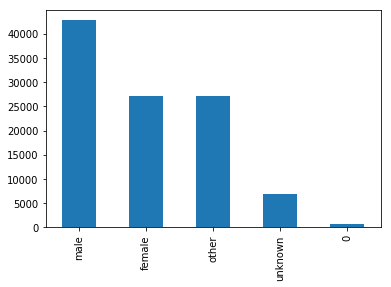

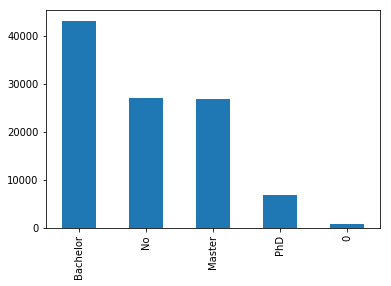

In [11]:
for field in ["Gender", "University Degree"]:
    train[field].value_counts().plot.bar()
    plt.show()

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


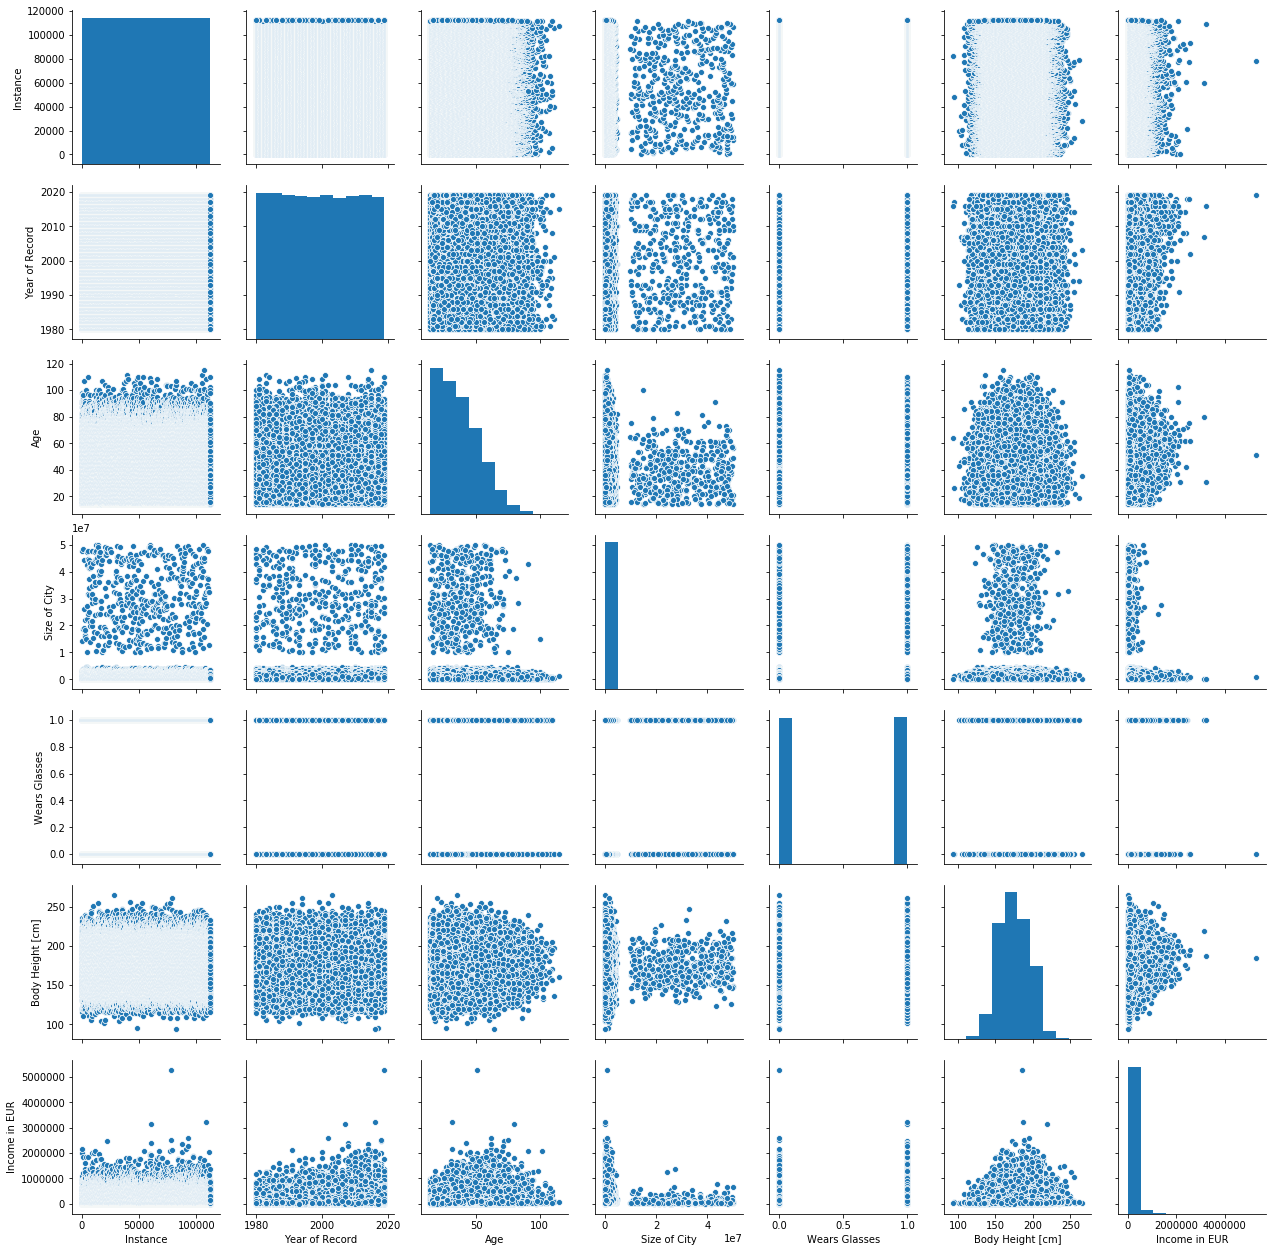

In [12]:
import seaborn as sns
g = sns.pairplot(train)

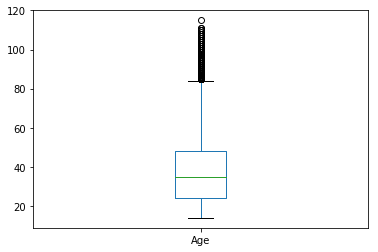

In [13]:
train["Age"].plot.box()

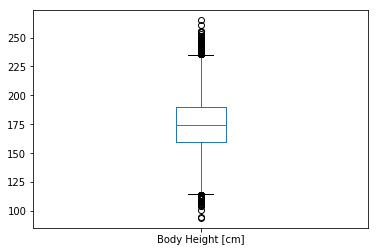

In [14]:
train["Body Height [cm]"].plot.box()

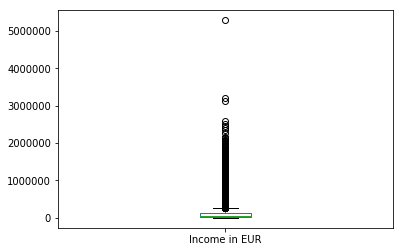

In [15]:
train["Income in EUR"].plot.box()

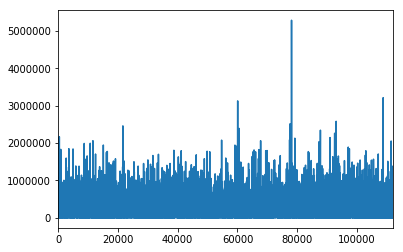

In [16]:
train["Income in EUR"].plot()

**To Know the Counts for the Following for information**

In [17]:
train["Profession"].value_counts()

pipefitter                                  261
procedural justice coordinator              256
production support                          246
port marine engineer                        246
preplacement nurse practitioner             245
                                           ... 
assistant quality assurance associate         1
application support reporting specialist      1
bartender                                     1
billing and posting clerk                     1
audit engineer                                1
Name: Profession, Length: 1340, dtype: int64

In [18]:
"Unknown" in train["Profession"].unique()

False

In [19]:
train["Country"].value_counts()

Switzerland     2327
Austria         2274
Togo            2247
Sierra Leone    2242
Israel          2236
                ... 
Thailand           1
Vietnam            1
South Africa       1
Grenada            1
Myanmar            1
Name: Country, Length: 160, dtype: int64

In [20]:
"Unknown" in train["Country"].unique()

False

**To Seperate Object, Numeric Data and TargetValue**

In [21]:
categorical_fields = ["Gender", "Country", "Profession", "University Degree"]
numerical_fields = ["Year of Record", "Age", "Size of City", "Body Height [cm]"]
result = ["Income in EUR"]

In [22]:
train["train"] = 1
test["train"] = 0

**Joining Two DataSets**

In [23]:
combined = pd.concat([train, test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


**Aspect of the combined dataset**

In [24]:
combined.shape

(185223, 14)

* Transforming Features

In [25]:
combined["Gender"].replace('0', 'unknown', inplace = True)

In [26]:
combined["University Degree"].replace('0', 'No', inplace=True)

In [27]:
combined.head(21)

,Age,Body Height [cm],Country,Gender,Hair Color,Income,Income in EUR,Instance,Profession,Size of City,University Degree,Wears Glasses,Year of Record,train
0,41.0,193,Belarus,unknown,Blond,NaN,61031.944160,1,steel workers,1239930,Bachelor,0,1997.0,1
1,41.0,186,Singapore,other,Black,NaN,91001.327640,2,safe event coordinator,1603504,Master,0,1996.0,1
2,28.0,170,Norway,other,Brown,NaN,157982.176700,3,receivables/payables analyst,1298017,PhD,1,2018.0,1
3,33.0,171,Cuba,other,Black,NaN,45993.757930,4,fleet assistant,751903,No,1,2006.0,1
4,46.0,188,United Arab Emirates,female,Blond,NaN,38022.162170,5,lead trainer,95389,No,0,2010.0,1
5,60.0,181,Liberia,male,Blond,NaN,125809.990300,6,senior security analyst,56080,Bachelor,0,1991.0,1
6,71.0,174,State of Palestine,NaN,Black,NaN,150319.422600,7,program associate,1205185,Bachelor,0,1982.0,1
7,36.0,190,Israel,male,Brown,NaN,11849.028760,8,retail specialist,31419,NaN,0,2008.0,1
8,43.0,189,South Sudan,male,Blond,NaN,48058.206070,9,intergovernmental outreach coordinator,85333,No,0,2015.0,1
9,16.0,157,Cuba,female,Black,NaN,90940.689120,10,lease analyst,1325383,Bachelor,1,2019.0,1


* Handle the Missing Values from the combined dataset

In [28]:
for field in categorical_fields:
    combined[field].fillna('unknown', inplace=True)

In [29]:
for field in numerical_fields:
    combined[field].fillna(combined[field].mean(), inplace=True)

In [30]:
combined.drop(['Wears Glasses', 'Hair Color'], axis=1, inplace=True)
combined.head()

,Age,Body Height [cm],Country,Gender,Income,Income in EUR,Instance,Profession,Size of City,University Degree,Year of Record,train
0,41.0,193,Belarus,unknown,NaN,61031.94416,1,steel workers,1239930,Bachelor,1997.0,1
1,41.0,186,Singapore,other,NaN,91001.32764,2,safe event coordinator,1603504,Master,1996.0,1
2,28.0,170,Norway,other,NaN,157982.17670,3,receivables/payables analyst,1298017,PhD,2018.0,1
3,33.0,171,Cuba,other,NaN,45993.75793,4,fleet assistant,751903,No,2006.0,1
4,46.0,188,United Arab Emirates,female,NaN,38022.16217,5,lead trainer,95389,No,2010.0,1


In [31]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185223 entries, 0 to 73229
Data columns (total 12 columns):
Age                  185223 non-null float64
Body Height [cm]     185223 non-null int64
Country              185223 non-null object
Gender               185223 non-null object
Income               0 non-null float64
Income in EUR        111993 non-null float64
Instance             185223 non-null int64
Profession           185223 non-null object
Size of City         185223 non-null int64
University Degree    185223 non-null object
Year of Record       185223 non-null float64
train                185223 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 18.4+ MB


* Handling OUTLIERS

In [32]:
train_describe = train.describe()

In [33]:
limits = {}
for field in numerical_fields+["Income in EUR"]:
    limits[field] = {}
    iqr = train_describe.loc["75%", field] - train_describe.loc["25%", field]
    limits[field]["upper"] = train_describe.loc["max", field] + 1.5*iqr
    limits[field]["lower"] = train_describe.loc["min", field] - 1.5*iqr
    
    if limits[field]["lower"]<0:
        limits[field]["lower"] = 0

In [34]:
limits

{'Year of Record': {'upper': 2049.0, 'lower': 1950.0},
 'Age': {'upper': 151.0, 'lower': 0},
 'Size of City': {'upper': 51660162.5, 'lower': 0},
 'Body Height [cm]': {'upper': 310.0, 'lower': 49.0},
 'Income in EUR': {'upper': 5428235.2235, 'lower': 0}}

In [35]:
for field in numerical_fields:
    print(train[train[field]<limits[field]["lower"]])
    print(train[train[field]>limits[field]["upper"]])

Empty DataFrame
Columns: [Instance, Year of Record, Gender, Age, Country, Size of City, Profession, University Degree, Wears Glasses, Hair Color, Body Height [cm], Income in EUR, train]
Index: []
Empty DataFrame
Columns: [Instance, Year of Record, Gender, Age, Country, Size of City, Profession, University Degree, Wears Glasses, Hair Color, Body Height [cm], Income in EUR, train]
Index: []
Empty DataFrame
Columns: [Instance, Year of Record, Gender, Age, Country, Size of City, Profession, University Degree, Wears Glasses, Hair Color, Body Height [cm], Income in EUR, train]
Index: []
Empty DataFrame
Columns: [Instance, Year of Record, Gender, Age, Country, Size of City, Profession, University Degree, Wears Glasses, Hair Color, Body Height [cm], Income in EUR, train]
Index: []
Empty DataFrame
Columns: [Instance, Year of Record, Gender, Age, Country, Size of City, Profession, University Degree, Wears Glasses, Hair Color, Body Height [cm], Income in EUR, train]
Index: []
Empty DataFrame
Colu

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Minimum and Maximum Scaling**

In [37]:
scaler = MinMaxScaler()

In [38]:
combined[numerical_fields] = scaler.fit_transform(combined[numerical_fields])

In [39]:
combined.head(17)

,Age,Body Height [cm],Country,Gender,Income,Income in EUR,Instance,Profession,Size of City,University Degree,Year of Record,train
0,0.241071,0.578947,Belarus,unknown,NaN,61031.944160,1,steel workers,0.024801,Bachelor,0.435897,1
1,0.241071,0.538012,Singapore,other,NaN,91001.327640,2,safe event coordinator,0.032073,Master,0.410256,1
2,0.125000,0.444444,Norway,other,NaN,157982.176700,3,receivables/payables analyst,0.025963,PhD,0.974359,1
3,0.169643,0.450292,Cuba,other,NaN,45993.757930,4,fleet assistant,0.015039,No,0.666667,1
4,0.285714,0.549708,United Arab Emirates,female,NaN,38022.162170,5,lead trainer,0.001907,No,0.769231,1
5,0.410714,0.508772,Liberia,male,NaN,125809.990300,6,senior security analyst,0.001120,Bachelor,0.282051,1
6,0.508929,0.467836,State of Palestine,unknown,NaN,150319.422600,7,program associate,0.024106,Bachelor,0.051282,1
7,0.196429,0.561404,Israel,male,NaN,11849.028760,8,retail specialist,0.000627,unknown,0.717949,1
8,0.258929,0.555556,South Sudan,male,NaN,48058.206070,9,intergovernmental outreach coordinator,0.001705,No,0.897436,1
9,0.017857,0.368421,Cuba,female,NaN,90940.689120,10,lease analyst,0.026510,Bachelor,1.000000,1


In [40]:
result_scaler = MinMaxScaler()

In [41]:
train = combined[combined["train"] == 1]
test = combined[combined["train"] == 0]
train.drop(["train", "Income"], axis=1, inplace=True)
test.drop(["train", "Income in EUR"], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
train.shape

(111993, 10)

In [43]:
test.shape

(73230, 10)

* TRAINING DataSet

In [44]:
train[result] = result_scaler.fit_transform(train[result])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
train[result].head(17)

,Income in EUR
0,0.012612
1,0.018276
2,0.030936
3,0.009770
4,0.008263
5,0.024855
6,0.029487
7,0.003316
8,0.010160
9,0.018265


In [46]:
train.head(17)

,Age,Body Height [cm],Country,Gender,Income in EUR,Instance,Profession,Size of City,University Degree,Year of Record
0,0.241071,0.578947,Belarus,unknown,0.012612,1,steel workers,0.024801,Bachelor,0.435897
1,0.241071,0.538012,Singapore,other,0.018276,2,safe event coordinator,0.032073,Master,0.410256
2,0.125000,0.444444,Norway,other,0.030936,3,receivables/payables analyst,0.025963,PhD,0.974359
3,0.169643,0.450292,Cuba,other,0.009770,4,fleet assistant,0.015039,No,0.666667
4,0.285714,0.549708,United Arab Emirates,female,0.008263,5,lead trainer,0.001907,No,0.769231
5,0.410714,0.508772,Liberia,male,0.024855,6,senior security analyst,0.001120,Bachelor,0.282051
6,0.508929,0.467836,State of Palestine,unknown,0.029487,7,program associate,0.024106,Bachelor,0.051282
7,0.196429,0.561404,Israel,male,0.003316,8,retail specialist,0.000627,unknown,0.717949
8,0.258929,0.555556,South Sudan,male,0.010160,9,intergovernmental outreach coordinator,0.001705,No,0.897436
9,0.017857,0.368421,Cuba,female,0.018265,10,lease analyst,0.026510,Bachelor,1.000000


* Splitting Data into Training and Validation Sets

In [47]:
from sklearn.model_selection import train_test_split
training_indices, validation_indices = train_test_split(train.index, test_size = 0.20)

In [48]:
X_train = train.iloc[training_indices]
X_train.drop(X_train[result], axis=1, inplace=True)
X_validation = train.iloc[validation_indices]
X_validation.drop(X_validation[result], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
y_train = train[result].iloc[training_indices]
y_validation = train[result].iloc[validation_indices]

In [50]:
X_train.shape


(89594, 9)

In [51]:
X_validation.shape

(22399, 9)

In [52]:
y_train.shape

(89594, 1)

In [53]:
y_validation.shape

(22399, 1)

> * ** Target Encoding**

In [54]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=['Gender', 'Country', 'Profession', 'University Degree']).fit(X_train, y_train)

In [55]:
X_train = enc.transform(X_train, y_train)

In [56]:
X_train.head(7)

,Age,Body Height [cm],Country,Gender,Instance,Profession,Size of City,University Degree,Year of Record
109128,0.169643,0.403509,0.006398,0.022309,109129,0.016863,0.003473,0.021704,0.384615
33724,0.071429,0.561404,0.017258,0.019992,33725,0.023921,0.039597,0.018385,0.794872
2652,0.464286,0.368421,0.020045,0.019992,2653,0.015821,0.020032,0.020387,0.846154
40569,0.008929,0.608187,0.006850,0.022305,40570,0.023902,0.007270,0.021704,0.589744
95254,0.125000,0.526316,0.009748,0.022305,95255,0.022210,0.001751,0.021704,1.000000
56646,0.098214,0.526316,0.006183,0.022309,56647,0.028978,0.015767,0.021704,0.435897
14286,0.303571,0.444444,0.059118,0.022305,14287,0.022280,0.068643,0.025543,0.179487


In [57]:
X_validation = enc.transform(X_validation, y_validation)

In [58]:
X_validation.head(7)

,Age,Body Height [cm],Country,Gender,Instance,Profession,Size of City,University Degree,Year of Record
40106,0.035714,0.678363,0.020278,0.022309,40107,0.016858,0.038358,0.020387,0.692308
88793,0.107143,0.508772,0.043120,0.022258,88794,0.016615,0.027981,0.021704,0.205128
70657,0.116071,0.391813,0.009224,0.019992,70658,0.018141,0.002939,0.020387,0.384615
59877,0.000000,0.631579,0.013363,0.022309,59878,0.017249,0.039965,0.021704,0.923077
47082,0.223214,0.222222,0.048732,0.019992,47083,0.034869,0.011164,0.020387,0.205128
32223,0.151786,0.672515,0.012655,0.022305,32224,0.021640,0.000379,0.023125,0.256410
19688,0.544643,0.532164,0.006640,0.022309,19689,0.026165,0.046336,0.020387,0.384615


In [59]:
train.isnull().sum()

Age                  0
Body Height [cm]     0
Country              0
Gender               0
Income in EUR        0
Instance             0
Profession           0
Size of City         0
University Degree    0
Year of Record       0
dtype: int64

In [60]:
train.describe()

,Age,Body Height [cm],Income in EUR,Instance,Size of City,Year of Record
count,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000
mean,0.208438,0.474972,0.021718,55997.000000,0.016778,0.497985
std,0.142869,0.116455,0.028313,32329.738686,0.043944,0.296245
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.089286,0.385965,0.006893,27999.000000,0.001453,0.230769
50%,0.187500,0.467836,0.011914,55997.000000,0.010122,0.487179
75%,0.303571,0.561404,0.024909,83995.000000,0.023692,0.743590
max,0.901786,1.000000,1.000000,111993.000000,1.000000,1.000000


In [61]:
train.head(17)

,Age,Body Height [cm],Country,Gender,Income in EUR,Instance,Profession,Size of City,University Degree,Year of Record
0,0.241071,0.578947,Belarus,unknown,0.012612,1,steel workers,0.024801,Bachelor,0.435897
1,0.241071,0.538012,Singapore,other,0.018276,2,safe event coordinator,0.032073,Master,0.410256
2,0.125000,0.444444,Norway,other,0.030936,3,receivables/payables analyst,0.025963,PhD,0.974359
3,0.169643,0.450292,Cuba,other,0.009770,4,fleet assistant,0.015039,No,0.666667
4,0.285714,0.549708,United Arab Emirates,female,0.008263,5,lead trainer,0.001907,No,0.769231
5,0.410714,0.508772,Liberia,male,0.024855,6,senior security analyst,0.001120,Bachelor,0.282051
6,0.508929,0.467836,State of Palestine,unknown,0.029487,7,program associate,0.024106,Bachelor,0.051282
7,0.196429,0.561404,Israel,male,0.003316,8,retail specialist,0.000627,unknown,0.717949
8,0.258929,0.555556,South Sudan,male,0.010160,9,intergovernmental outreach coordinator,0.001705,No,0.897436
9,0.017857,0.368421,Cuba,female,0.018265,10,lease analyst,0.026510,Bachelor,1.000000


* **Training|Learning Models**

In [62]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

In [63]:
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
linear_reg_model.score(X_validation, y_validation)

0.718155447942453

* **Making Prediction for our Model**

In [65]:
X_test = test.drop(["Income"], axis=1)
X_test.shape

(73230, 9)

In [66]:
test = enc.transform(X_test)

In [67]:
test_predictions = linear_reg_model.predict(test)

In [68]:
test["Income"] = result_scaler.inverse_transform(test_predictions.reshape((-1,1)))
#test_df["Income"] = result_scaler.inverse_transform()
test["Income"].head()

0     27750.534909
1    -30441.413045
2     39760.543446
3    150476.844210
4     28203.067351
Name: Income, dtype: float64

* ****Submission FILE for Trinity College Dublin****

In [69]:
submission_data = pd.read_csv("/kaggle/input/tcd-dataset/tcd-is-2021-submission-real.csv")

In [70]:
submission_data = submission_data[["Instance"]].merge(test[submission_data.columns], on="Instance")

In [71]:
submission_data.to_csv("tcd-is-2021-submission-real.csv")

* ****Root Mean Square Error****

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
y_true = pd.read_csv("/kaggle/input/tcd-dataset/tcd-is-2021-training.csv")['Income in EUR']

In [74]:
y_validation_true = result_scaler.inverse_transform(y_validation)
y_validation_true

array([[ 85156.7105  ],
       [120840.6625  ],
       [ 22132.16729 ],
       ...,
       [ 40703.81702 ],
       [  3165.077826],
       [256576.3511  ]])

In [75]:
validation_pred = linear_reg_model.predict(X_validation)
validation_pred = result_scaler.inverse_transform(validation_pred.reshape((-1,1)))
validation_pred

array([[ 76651.27798848],
       [161262.86098369],
       [-15649.78533022],
       ...,
       [ 55320.88329141],
       [-45863.29160503],
       [325205.72922381]])

In [76]:
difference = y_validation_true - validation_pred

In [77]:
sqr = difference * difference
sqr

array([[7.23423822e+07],
       [1.63395413e+09],
       [1.42747594e+09],
       ...,
       [2.13658626e+08],
       [2.40378101e+09],
       [4.70999154e+09]])

In [78]:
summatn = np.sum(sqr)
summatn

137846250299331.33

> **CALCULATE__RMSE for our MODEL** 

In [79]:
RMSE = np.sqrt(summatn / np.size(validation_indices))
RMSE

78448.23259655765